In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Robert Swain

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

In [3]:
sample_proportions(sample_size, eligible_population)

array([ 0.33,  0.67])

In [4]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [5]:
one_simulated_count()

21.0

In [6]:
# Crushed ICE: create an array called counts and add 10,000 simulated counts to it
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

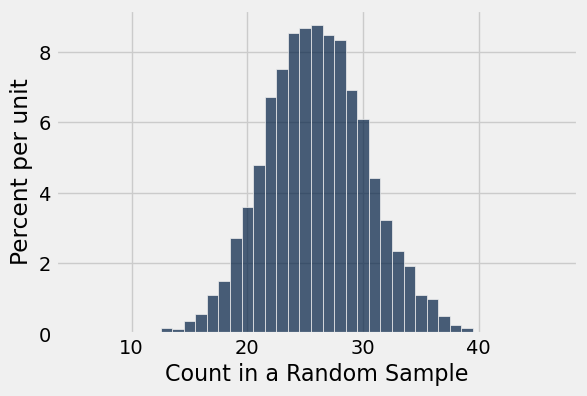

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins =  np.arange(5.5, 46.6, 1))

In [8]:
np.count_nonzero(counts <= 8)

0

---

# Jury selection in Alameda county

In [9]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


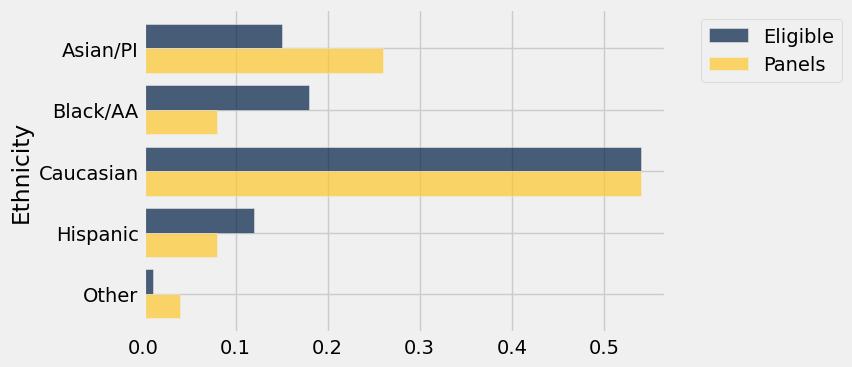

In [10]:
jury.barh('Ethnicity')

In [11]:
# Crushed ICE: There were 1453 people on juries duirng the study.
# Using the proportions of eligible jurors and sample_proportions, simulate picking 1453 jurors.
model = make_array(0.15, 0.18, 0.54, 0.12, 0.01)

In [12]:
simulated = sample_proportions(1423, model)
simulated

array([ 0.16163036,  0.19395643,  0.52143359,  0.11595221,  0.00702741])

In [13]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian/PI,0.15,0.26,0.16163
Black/AA,0.18,0.08,0.193956
Caucasian,0.54,0.54,0.521434
Hispanic,0.12,0.08,0.115952
Other,0.01,0.04,0.00702741


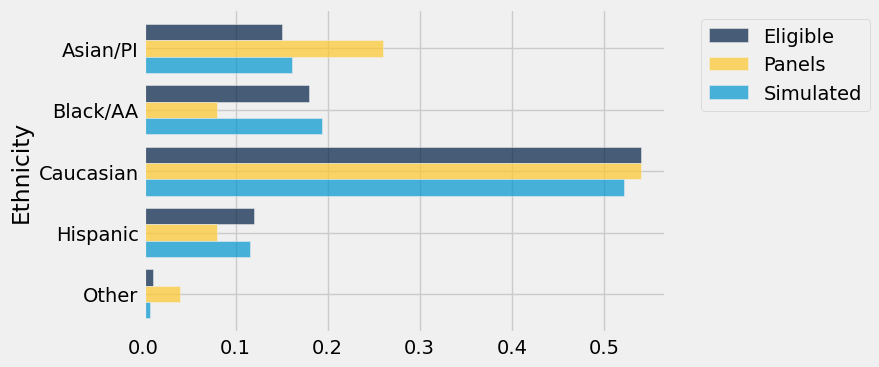

In [14]:
jury_with_simulated.barh('Ethnicity')

In [15]:
# There aren't just two things to compare! Goal: make one number to represent the differences.
# We need a new statistic to measure the diffrence between the distributions!

In [16]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [17]:
sum(jury_with_difference.where('Difference', are.above(0)).column('Difference'))

0.14000000000000001

In [18]:
sum(abs(jury_with_difference.column('Difference'))) / 2

0.14000000000000001

In [19]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2)) / 2

In [20]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [21]:
simulated_tvd = tvd(sample_proportions(1423, model), jury.column('Eligible'))
simulated_tvd

0.018826423049894601

In [22]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

# Crushed ICE: simulate 10,000 tvds into the tvds array
num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

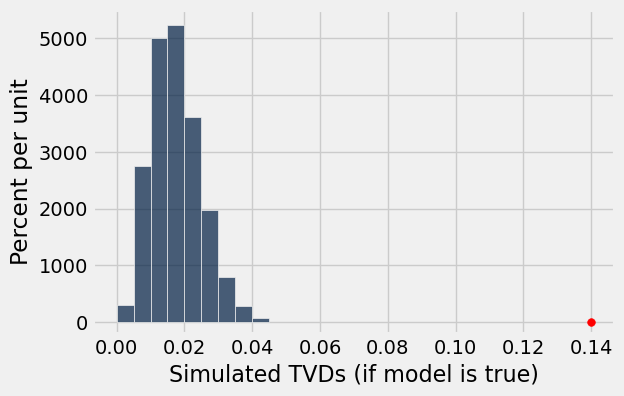

In [23]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)

# Plotting details; ignore this code
plt.ylim(-2, 55)
plt.scatter(obsvd_tvd, 0, color='red', s=30);

In [24]:
np.count_nonzero(tvds >= 0.14)

0

# Mendel

In [25]:
705/929

0.7588805166846071

In [26]:
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [27]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)

sample_proportions(929, mendel_proportions)

array([ 0.73735199,  0.26264801])

In [28]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

one_simulated_distance()

0.4036598493003196

In [29]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

In [30]:
dists = Table().with_column(
    'Distance between Sample % and 75%', distances
)
dists

Distance between Sample % and 75%
0.457481
0.188375
0.672766
0.888052
1.48009
0.080732
2.07212
0.080732
2.55651
0.941873


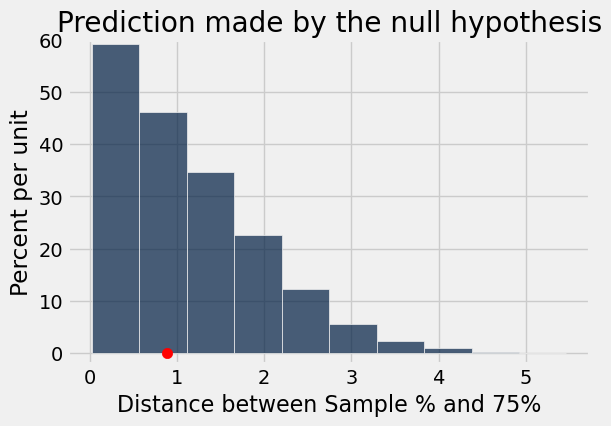

In [31]:
dists.hist()
plt.title('Prediction made by the null hypothesis')

plt.ylim(-.02, .6)
plt.scatter(observed_statistic, 0, color='red', s=55);

In [32]:
np.count_nonzero(distances >= observed_statistic) / repetitions

0.5482

In [33]:
# ^ a p-value

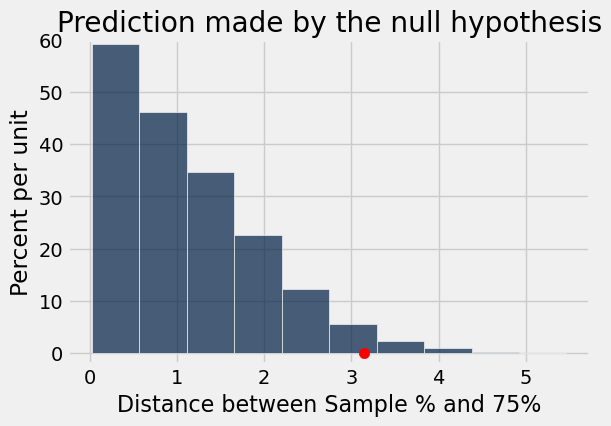

In [34]:
different_observed_statistic = 3.14

dists.hist()
plt.title('Prediction made by the null hypothesis')

plt.ylim(-.02, .6)
plt.scatter(different_observed_statistic, 0, color='red', s=55);

In [35]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0266

# Midterm scores

In [36]:
scores = Table.read_table('data/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [37]:
# Crushed ICE: get the average midterm scores by section
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [38]:
scores.group('Section').show()

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [39]:
section_3_average = scores.group('Section', np.average).column('Midterm average').item(2)
section_3_size = scores.group('Section').column('count').item(2)

In [40]:
# Crushed ICE: simulate a section with the same size as Section 3 by picking random students ,
# and get the average score.
# Don't allow any students to be included multiple times!
random_section = scores.sample(section_3_size, with_replacement=False)
random_section

Section,Midterm
7,10
6,21
1,20
2,13
12,16
6,20
7,21
12,25
10,13
2,11


In [41]:
np.average(random_section.column('Midterm'))

15.925925925925926

In [42]:
np.average(scores.sample(section_3_size, with_replacement=False).column('Midterm'))

16.222222222222221

In [43]:
def one_simulated_average():
    return np.average(scores.sample(section_3_size, with_replacement=False).column('Midterm'))

one_simulated_average()

17.25925925925926

In [44]:
# Crushed ICE: simluate 10,000 averages into an array called sample_averages
simulations = 10000
sample_averages = make_array()
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, one_simulated_average())

In [45]:
sample_averages

array([ 15.48148148,  16.55555556,  15.88888889, ...,  15.62962963,
        15.33333333,  13.88888889])

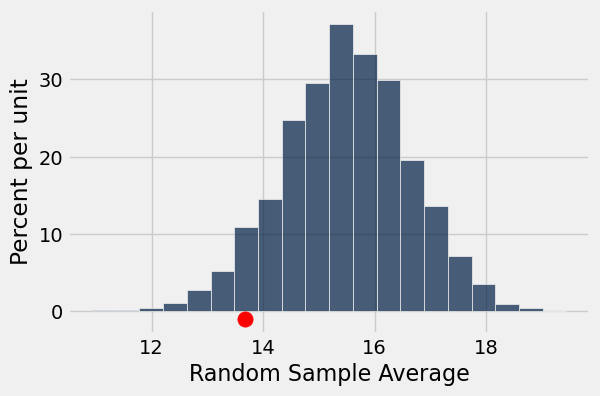

In [46]:
# Crushed ICE: create a histogram and calculate the p-value
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plt.scatter(section_3_average, -0.01, color='red', s=120);

In [47]:
np.count_nonzero(sample_averages <= section_3_average) / simulations

0.0596

In [48]:
# What would you do if you were the teacher?